In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
import os
from skimage.io import imread
import numpy as np

In [2]:
all_images = glob(os.path.join('..', 'data', '*.tif'))
img_df = pd.DataFrame([dict(path = c_file) for c_file in all_images])
img_df['basename'] = img_df['path'].map(lambda x: os.path.basename(x).split('.')[0])
img_df['frame_id'] = img_df['basename'].map(lambda x: '_'.join(x.split('_')[0:-1]))
img_df['sample'] = img_df['basename'].map(lambda x: x.split('_')[0])
img_df['slice'] = img_df['basename'].map(lambda x: int(x.split('_')[3]))
img_df['frame'] = img_df['basename'].map(lambda x: int(x.split('_')[1]))
img_df.sample(10)

path       basename  frame_id sample  slice  \
8   ../data/MI5_1_02_1502.rec.8bit.tif  MI5_1_02_1502  MI5_1_02    MI5   1502   
58  ../data/MI7_1_02_1305.rec.8bit.tif  MI7_1_02_1305  MI7_1_02    MI7   1305   
43  ../data/MI5_1_01_1503.rec.8bit.tif  MI5_1_01_1503  MI5_1_01    MI5   1503   
21  ../data/MI5_1_00_1508.rec.8bit.tif  MI5_1_00_1508  MI5_1_00    MI5   1508   
42  ../data/MI5_1_00_1502.rec.8bit.tif  MI5_1_00_1502  MI5_1_00    MI5   1502   
0   ../data/MI5_0_00_1502.rec.8bit.tif  MI5_0_00_1502  MI5_0_00    MI5   1502   
75  ../data/MI7_0_00_1306.rec.8bit.tif  MI7_0_00_1306  MI7_0_00    MI7   1306   
24  ../data/MI5_1_02_1511.rec.8bit.tif  MI5_1_02_1511  MI5_1_02    MI5   1511   
59  ../data/MI5_0_00_1508.rec.8bit.tif  MI5_0_00_1508  MI5_0_00    MI5   1508   
22  ../data/MI7_0_00_1309.rec.8bit.tif  MI7_0_00_1309  MI7_0_00    MI7   1309   

    frame  
8       1  
58      1  
43      1  
21      1  
42      1  
0       0  
75      0  
24      1  
59      0  
22      0

# Show Images and Histogram for Samples
Here we show the images and the histograms for the samples

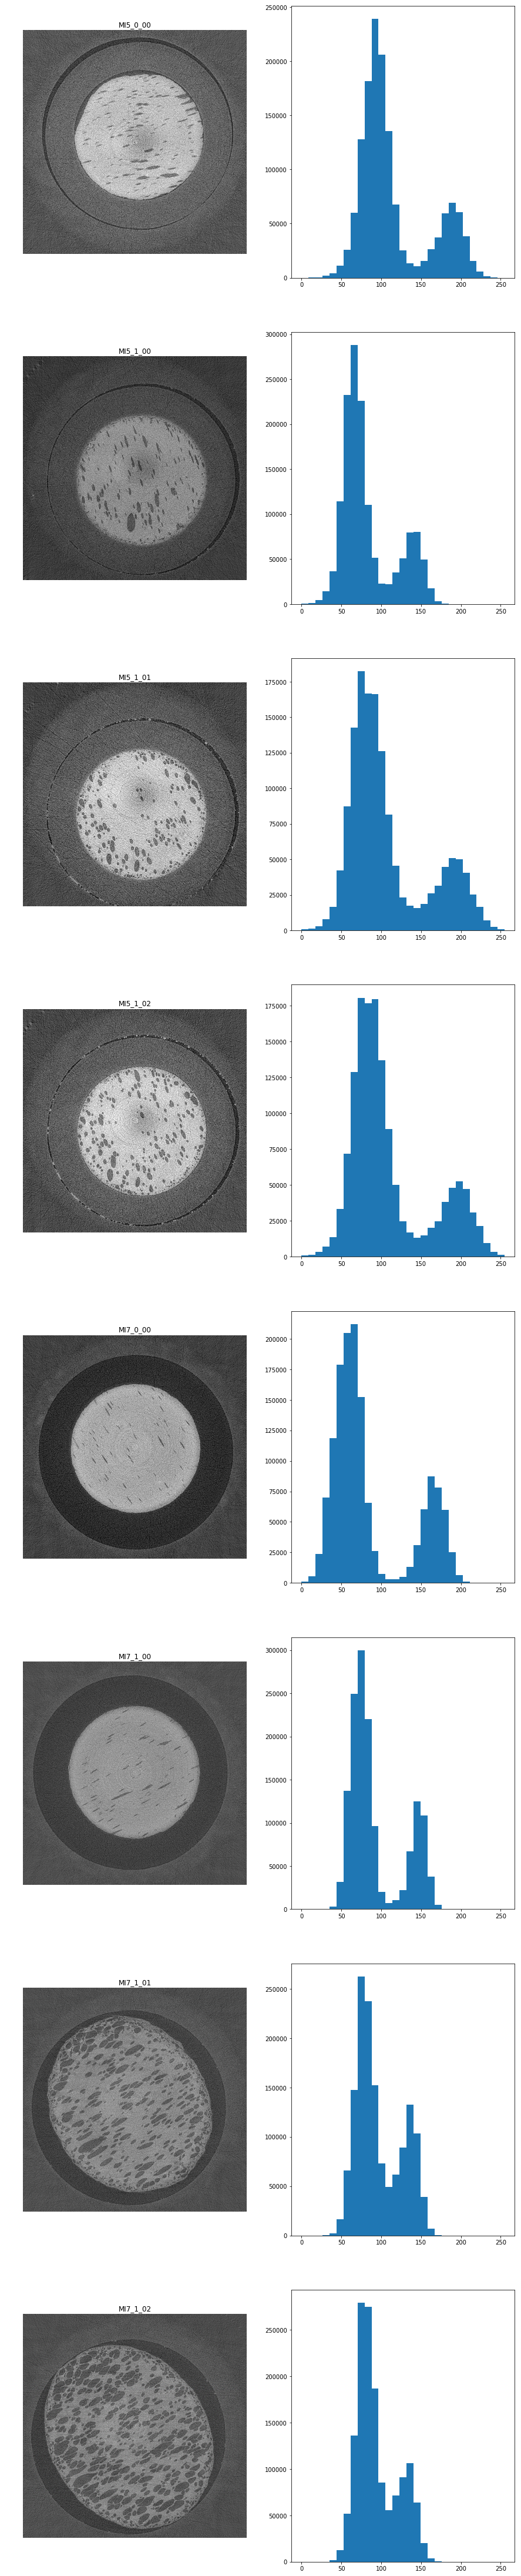

In [3]:
frames_iter = img_df.sort_values(['sample', 'frame', 'slice']).groupby(['frame_id'])
fig, m_axs = plt.subplots(len(frames_iter), 2, figsize = (15, 10*len(frames_iter)))
for (c_ax_img, c_ax_hist), (c_name, c_df) in zip(m_axs, frames_iter):
    c_slice = imread(c_df['path'].values[0])
    c_ax_img.imshow(c_slice, cmap = 'gray', vmin = 0, vmax = 255)
    c_ax_img.set_title(c_name)
    c_ax_img.axis('off')
    c_ax_hist.hist(c_slice.ravel(), np.linspace(0, 255, 30))

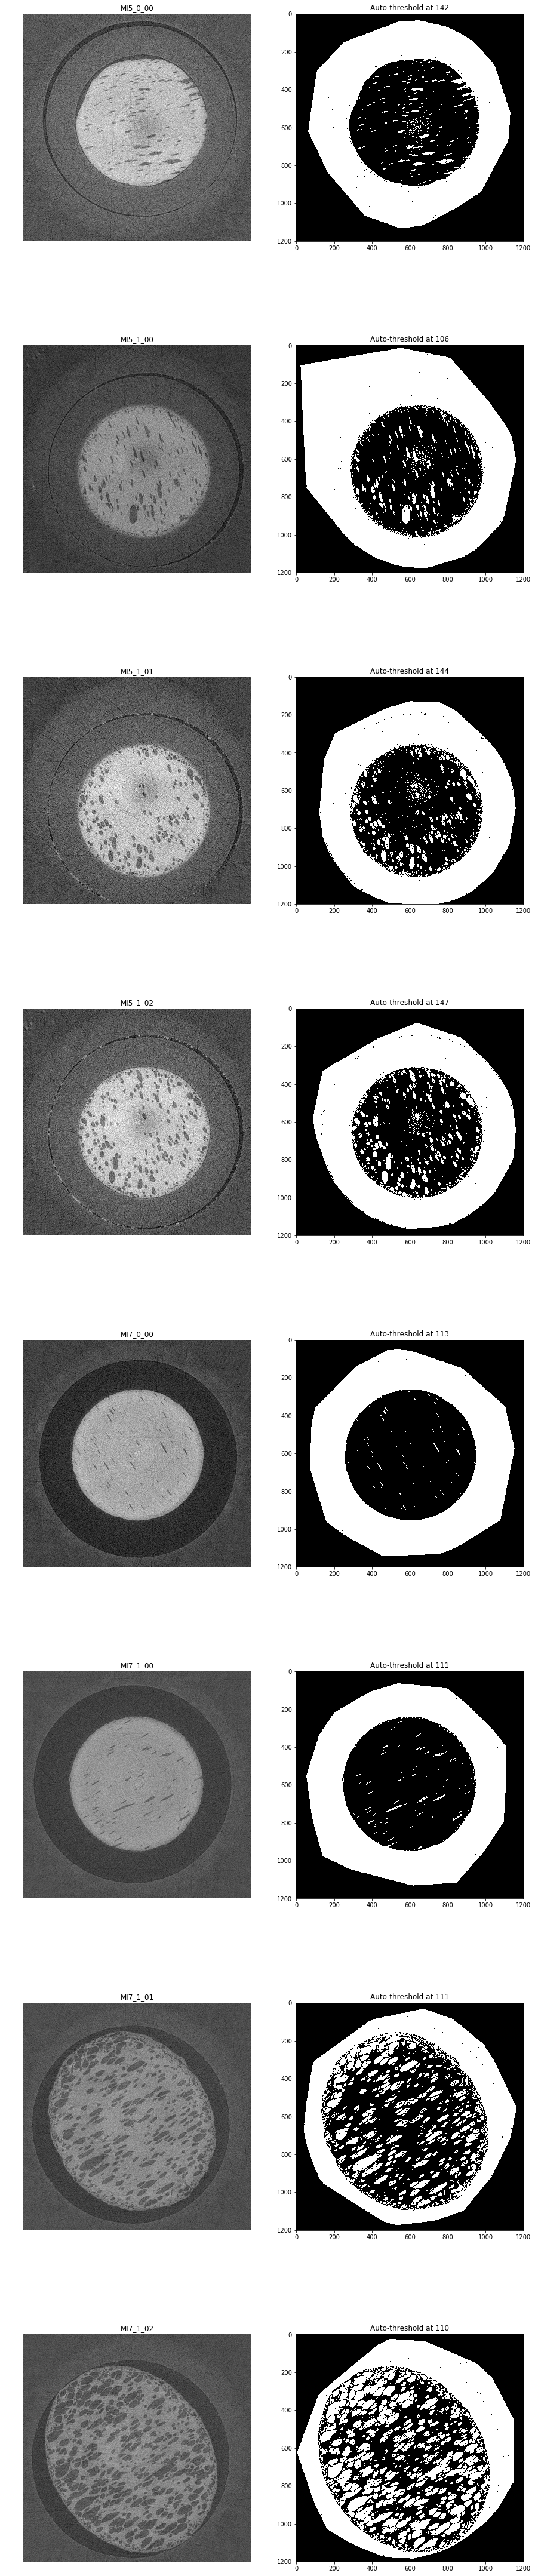

In [4]:
from skimage.filters import threshold_minimum
from skimage.morphology.convex_hull import convex_hull_image
def threshold_slice(in_slice):
    thresh_min = threshold_minimum(in_slice)
    solid_part = convex_hull_image(c_slice>thresh_min)
    porous_part = c_slice < thresh_min
    return solid_part*porous_part, thresh_min
    
fig, m_axs = plt.subplots(len(frames_iter), 2, figsize = (15, 10*len(frames_iter)))
for (c_ax_img, c_ax_seg), (c_name, c_df) in zip(m_axs, frames_iter):
    c_slice = imread(c_df['path'].values[0])
    c_ax_img.imshow(c_slice, cmap = 'gray', vmin = 0, vmax = 255)
    c_ax_img.set_title(c_name)
    c_ax_img.axis('off')
    # calculate threshold
    por_img, thresh_min = threshold_slice(c_slice)
    c_ax_seg.imshow(por_img, cmap = 'bone')
    c_ax_seg.set_title('Auto-threshold at {}'.format(thresh_min))